In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
pd.to_datetime('2024-02-29 9:00am')

Timestamp('2024-02-29 09:00:00')

In [4]:
data = pd.read_csv("Et_Covid19.csv")

In [3]:
data.shape

(215, 3)

In [5]:
data.head(5)

,Date,New_cases,New_deaths
0,1/5/2020,NaN,NaN
1,1/12/2020,NaN,NaN
2,1/19/2020,NaN,NaN
3,1/26/2020,NaN,NaN
4,2/2/2020,NaN,NaN


In [6]:
data.dtypes

Date           object
New_cases     float64
New_deaths    float64
dtype: object

In [7]:
data = data.set_index('Date')
data.head(5)

,New_cases,New_deaths
Date,,
1/5/2020,NaN,NaN
1/12/2020,NaN,NaN
1/19/2020,NaN,NaN
1/26/2020,NaN,NaN
2/2/2020,NaN,NaN


In [10]:
data.index = pd.to_datetime(data.index)
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.day_name()

In [11]:
data.sample(5, random_state=0)

,New_cases,New_deaths,Year,Month,Weekday Name
Date,,,,,
2023-10-22,7.0,NaN,2023,10,Sunday
2020-09-20,4243.0,93.0,2020,9,Sunday
2021-09-19,9266.0,208.0,2021,9,Sunday
2023-03-26,177.0,1.0,2023,3,Sunday
2023-04-16,67.0,1.0,2023,4,Sunday


In [15]:
#selecting single day
data.loc['5/13/2021':'5/29/2021']

,New_cases,New_deaths,Year,Month,Weekday Name
Date,,,,,
2021-05-16,3615.0,105.0,2021,5,Sunday
2021-05-23,3069.0,92.0,2021,5,Sunday


In [16]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

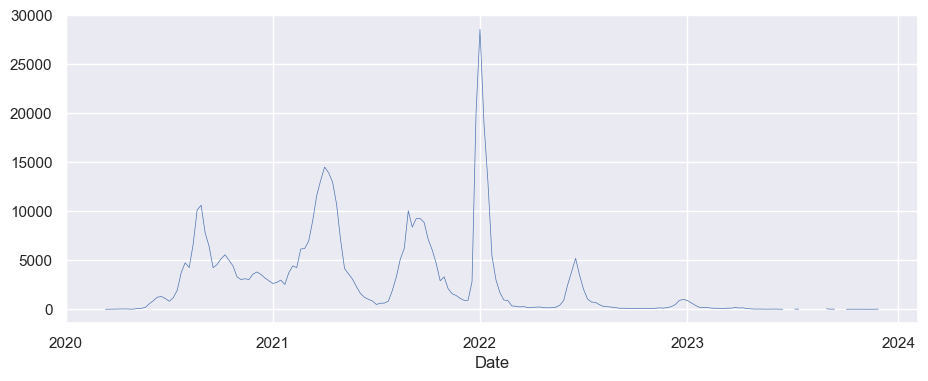

In [17]:
data['New_cases'].plot(linewidth=0.5);

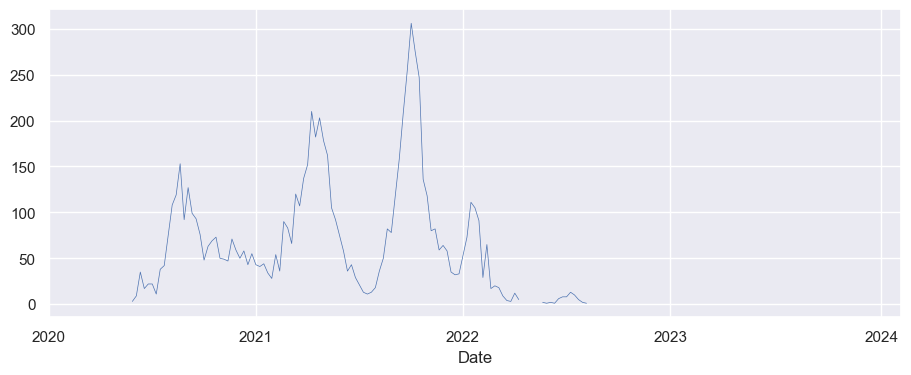

In [24]:
data['New_deaths'].plot(linewidth=0.5);

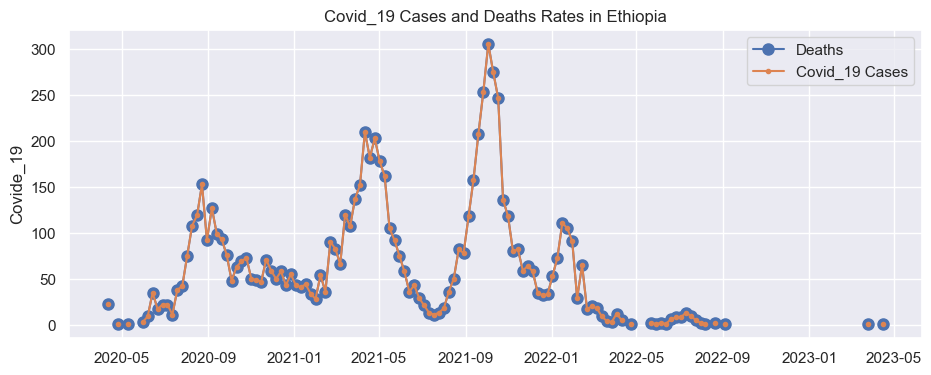

In [36]:
fig, ax = plt.subplots()
ax.plot(data['New_deaths'], marker='o', 
        markersize=8, linestyle='-', label='Deaths')
ax.plot(data['New_deaths'],
     marker='.', linestyle='-', label='Covid_19 Cases')
ax.set_ylabel('Covide_19')
ax.set_title('Covid_19 Cases and Deaths Rates in Ethiopia');
ax.legend();

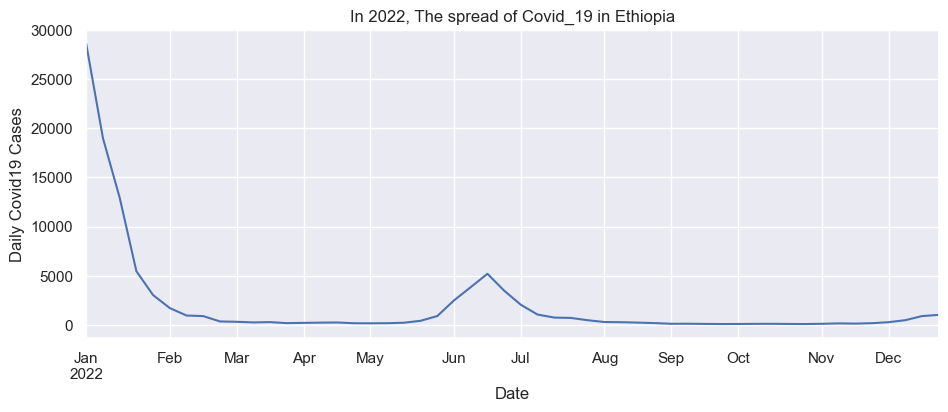

In [20]:
ax = data.loc['2022', 'New_cases'].plot()
ax.set_ylabel('Daily Covid19 Cases')
ax.set_title('In 2022, The spread of Covid_19 in Ethiopia');

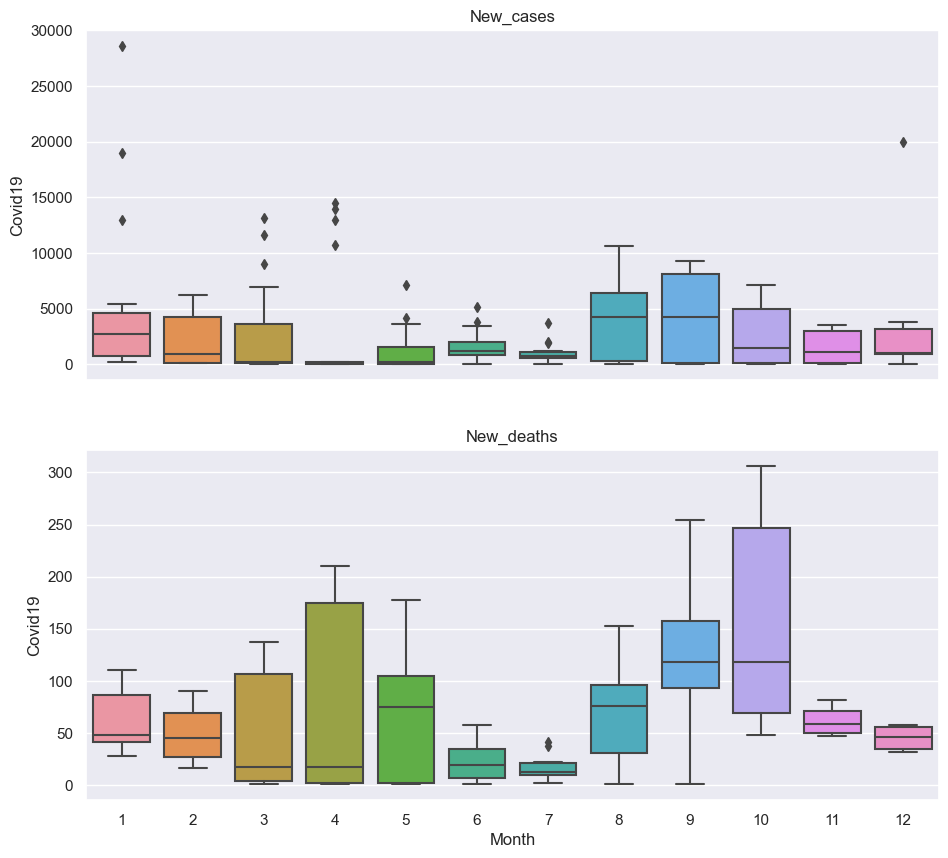

In [23]:
try:
 fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
 for name, ax in zip(['New_cases', 'New_deaths'], axes):
  sns.boxplot(data=data, x='Month', y=name, ax=ax)
  ax.set_ylabel('Covid19')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
    ax.set_xlabel('')
except IndentationError as e:
    print(f"An error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [26]:
data_columns = ['New_cases', 'New_deaths']
# Resample to weekly frequency, aggregating with mean
data_mean = data[data_columns].resample('W').mean()
data_mean.head(3)

,New_cases,New_deaths
Date,,
2020-01-05,NaN,NaN
2020-01-12,NaN,NaN
2020-01-19,NaN,NaN


In [27]:
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean.head(3)

print(data.shape[0])
print(data_weekly_mean.shape[0])

215
215


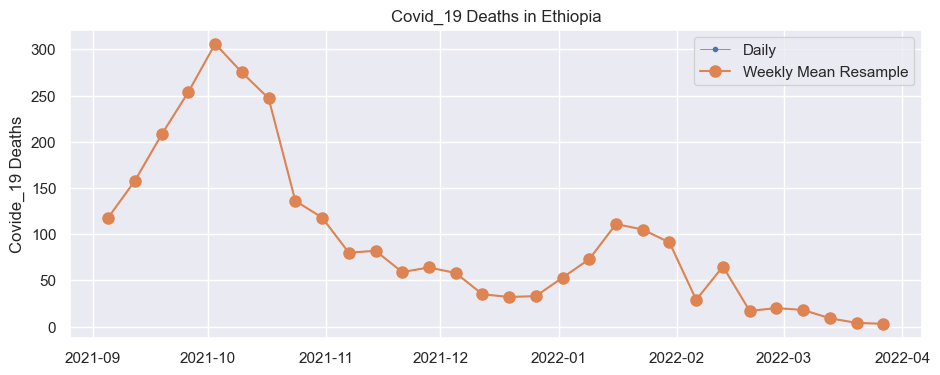

In [32]:
# Start and end of the date range to extract
start, end = '2021-09', '2022-03'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'New_deaths'],marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'New_deaths'], marker='o', 
        markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Covide_19 Deaths')
ax.set_title('Covid_19 Deaths in Ethiopia');
ax.legend();

In [30]:
# Compute the centered 7-day rolling mean
data_7d = data[data_columns].rolling(7, center=True).mean()
data_7d.head(10)

,New_cases,New_deaths
Date,,
2020-01-05,NaN,NaN
2020-01-12,NaN,NaN
2020-01-19,NaN,NaN
2020-01-26,NaN,NaN
2020-02-02,NaN,NaN
2020-02-09,NaN,NaN
2020-02-16,NaN,NaN
2020-02-23,NaN,NaN
2020-03-01,NaN,NaN


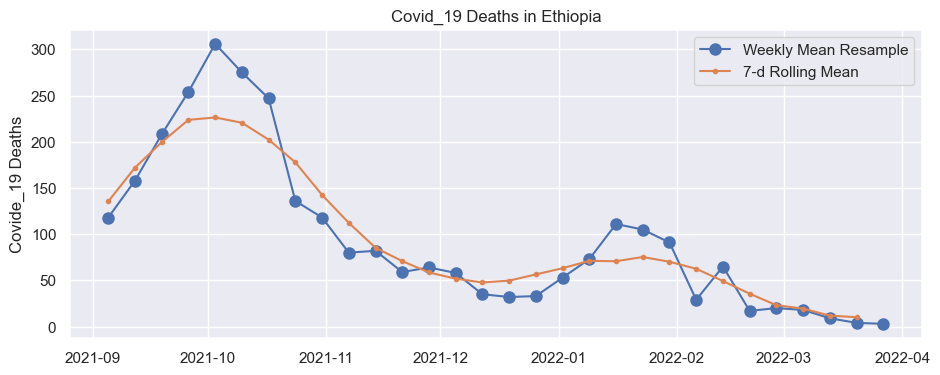

In [33]:
# Start and end of the date range to extract
start, end = '2021-09', '2022-03'
# plot weekly series and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(data_weekly_mean.loc[start:end, 'New_deaths'], marker='o', 
        markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(data_7d.loc[start:end, 'New_deaths'],
     marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Covide_19 Deaths')
ax.set_title('Covid_19 Deaths in Ethiopia');
ax.legend();

In [6]:
data2 = {
'Year':['2019','2020','2021','2021','2023'],
'GDP' :['89,640,012,689','95,071,776,945' ,'99,269,000,000','126,783,000,000' ,'155,804,000,000'],
'gdp_per_cap' :['785','811','835','1,028.00','1,473.00'],
'Population' :['114,120,594','117,190,911','120,283,026','123,379,924','126,000,000']}

In [8]:
data2

{'Year': ['2019', '2020', '2021', '2021', '2023'],
 'GDP': ['89,640,012,689',
  '95,071,776,945',
  '99,269,000,000',
  '126,783,000,000',
  '155,804,000,000'],
 'gdp_per_cap': ['785', '811', '835', '1,028.00', '1,473.00'],
 'Population': ['114,120,594',
  '117,190,911',
  '120,283,026',
  '123,379,924',
  '126,000,000']}

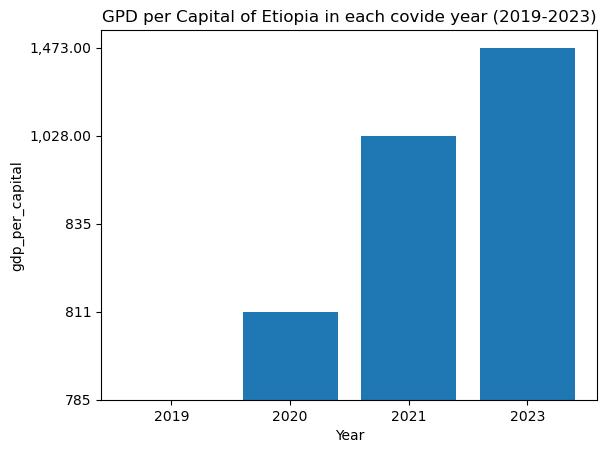

In [10]:
plt.bar(data2['Year'], data2['gdp_per_cap'])
plt.xlabel('Year')
plt.ylabel('gdp_per_capital')
plt.title('GPD per Capital of Etiopia in each covide year (2019-2023)')
plt.show()

In [12]:
total_cases = data['New_cases'].sum()
print(total_cases)

501117.0


In [14]:
total_deaths = data[ 'New_deaths'].sum()
print(total_deaths)

7574.0
